In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import pearsonr

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Helvetica'

In [2]:
brain_5533 = pd.read_csv('./output_dorado_sup_CGG_counts/SQK-NBD114-24_barcode01.filtered_all_counts_V5_len_5000.txt', sep='\t', header=None)
brain_5006 = pd.read_csv('./output_dorado_sup_CGG_counts/SQK-NBD114-24_barcode02.filtered_all_counts_V5_len_5000.txt', sep='\t', header=None)
brain_5319 = pd.read_csv('./output_dorado_sup_CGG_counts/SQK-NBD114-24_barcode03.filtered_all_counts_V5_len_5000.txt', sep='\t', header=None)
brain_5746 = pd.read_csv('./output_dorado_sup_CGG_counts/SQK-NBD114-24_barcode09.filtered_all_counts_V5_len_5000.txt', sep='\t', header=None)
brain_6131 = pd.read_csv('./output_dorado_sup_CGG_counts/SQK-NBD114-24_barcode10.filtered_all_counts_V5_len_5000.txt', sep='\t', header=None)

In [3]:
brain_5533['Sample'] = '5533'
brain_5006['Sample'] = '5006'
brain_5319['Sample'] = '5319'
brain_5746['Sample'] = '5746'
brain_6131['Sample'] = '6131'
CGG_counts = pd.concat([brain_5533, brain_5006, brain_5319, brain_5746, brain_6131], ignore_index=True)
CGG_counts = CGG_counts.rename(columns={1: 'CGG_count'})

/var/folders/v1/3py01kc1619d4sj6bsmhx3br0000gn/T/ipykernel_97304/1323554393.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.swarmplot(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-package

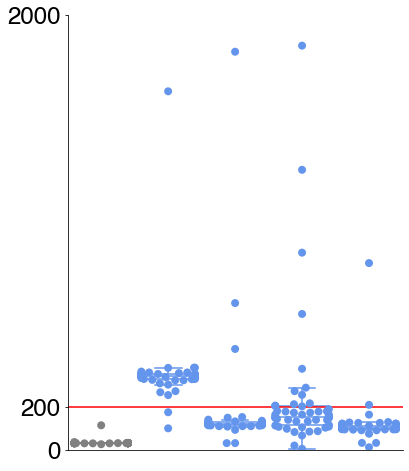

In [4]:
order = ['5533', '5319', '5746', '5006', '6131']

my_colors = {
    '5533': 'grey',   
    '5006': 'cornflowerblue',   
    '5319': 'cornflowerblue',   
    '5746': 'cornflowerblue',   
    '6131': 'cornflowerblue'    
}

plt.figure(figsize=(6, 8))
f = sns.swarmplot(
    data=CGG_counts, x='Sample', y='CGG_count',
    size=8, order=order, palette=my_colors
)

sns.boxplot(
    data=CGG_counts, x='Sample', y='CGG_count',
    fill=False, order=order, palette=my_colors, showfliers=False
)


plt.axhline(y=200, color='red')
plt.ylim(0, 2000)
plt.yticks([0,200,2000], fontsize=24)
f.set(xlabel=None, ylabel=None)
f.set_xticks([])
f.spines['top'].set_visible(False)
f.spines['right'].set_visible(False)

# plt.savefig('../Figure/SFig_Nanopore_CGG_counts_brain.png', bbox_inches='tight', dpi=600)